In [1]:
import mdtraj as md

In [2]:
from pathlib import Path

In [3]:
!pwd

/home/crystal/Desktop/D-ile


In [4]:
traj = md.load_dcd('D_prd.dcd', top='D_clean.pdb')

In [5]:
traj

<mdtraj.Trajectory with 2000000 frames, 41 atoms, 2 residues, and unitcells at 0x7fcb54cbe860>

In [6]:
traj = md.Trajectory.superpose(traj, traj[0], frame=0, atom_indices=None, ref_atom_indices=None, parallel=True)

In [7]:
md.rmsd(traj, traj[0], frame=0, atom_indices=None, parallel=True, precentered=False)

array([0.        , 0.02617017, 0.02910171, ..., 0.25709057, 0.25332087,
       0.25229198], dtype=float32)

In [8]:
md.rmsf(traj, traj[0], frame=0, atom_indices=None, parallel=True, precentered=False)

array([0.1534861 , 0.20019555, 0.19997184, 0.20047368, 0.08028924,
       0.07370346, 0.12262895, 0.15864792, 0.05506485, 0.13365081,
       0.15004139, 0.20669055, 0.20718643, 0.2054289 , 0.09567887,
       0.16218702, 0.17572568, 0.14720868, 0.19976026, 0.19831982,
       0.19971935, 0.06002938, 0.10256536, 0.1866163 , 0.08206432,
       0.12482311, 0.2545698 , 0.12149944, 0.17557533, 0.1780931 ,
       0.17650668, 0.25500718, 0.05189298, 0.13001189, 0.10932301,
       0.17822643, 0.17506889, 0.16804309, 0.21710053, 0.21624643,
       0.2188828 ], dtype=float32)

In [9]:
md.compute_phi(traj)

(array([[ 4, 21, 24, 23]]),
 array([[-1.1248068],
        [-1.0031949],
        [-0.9647075],
        ...,
        [ 1.566942 ],
        [ 1.7314515],
        [ 1.46606  ]], dtype=float32))

In [10]:
md.compute_psi(traj)

(array([[ 0,  5,  4, 21]]),
 array([[ 1.1864308],
        [ 1.0971526],
        [ 1.179591 ],
        ...,
        [-2.6862783],
        [-2.6871002],
        [-2.2614856]], dtype=float32))

In [11]:
psi_indices, phi_indices = [ 0,  5,  4, 21], [ 4, 21, 24, 23]
angles = md.compute_dihedrals(traj, [phi_indices, psi_indices])
print(angles)

[[-1.1248068  1.1864308]
 [-1.0031949  1.0971526]
 [-0.9647075  1.179591 ]
 ...
 [ 1.566942  -2.6862783]
 [ 1.7314515 -2.6871002]
 [ 1.46606   -2.2614856]]


In [12]:
angles.shape

(2000000, 2)

from pylab import *
from math import pi

figure()
title('Dihedral Map: D-Isoleucine dipeptide')
scatter(angles[:, 0], angles[:, 1], marker='x', c=traj.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

fig, ax = plt.subplots(figsize=(6,6),tight_layout=True)
_,_,_,hist = ax.hist2d(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, bins=60, range=[[-180,180],[-180,180]])
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle', fontsize =15)
ax.set_title('Dihedral Map: D-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('D-Isoleucine dipeptide_dihedrals.png', dpi=600)

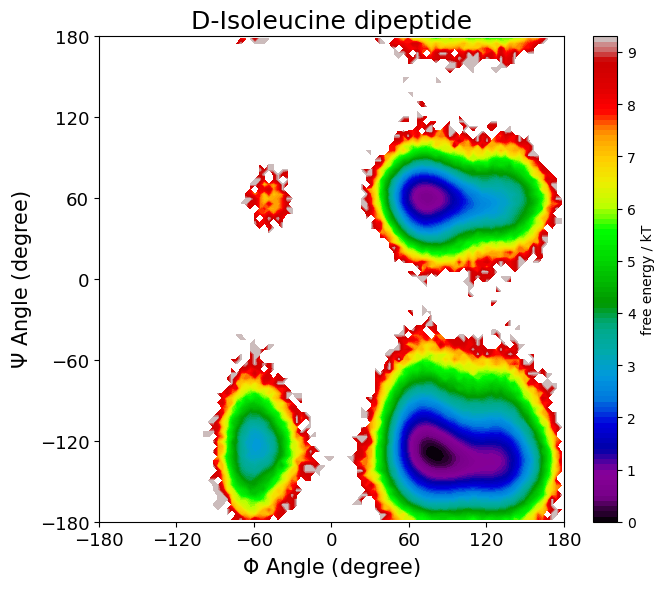

In [13]:
import pyemma as pm
from pylab import *
from math import pi
fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
fes = pm.plots.plot_free_energy(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, nbins=100, ax=ax)
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('D-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('D-Isoleucine dipeptide_freeenergy.png', dpi=600)
plt.show()

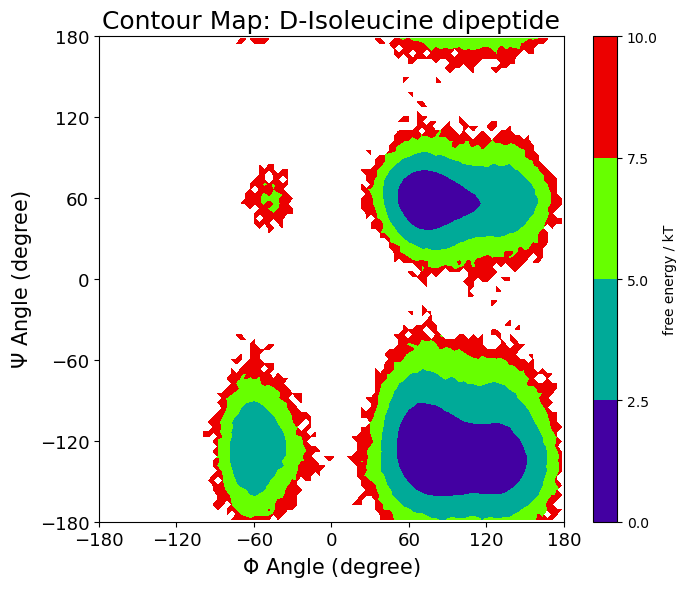

In [14]:
fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)
fes = pm.plots.plot_free_energy(angles[:, 0]*180/math.pi, angles[:, 1]*180/math.pi, nbins=100, ncontours=3, ax=ax)
ax.set_xlim([-180, 180])
ax.set_ylim([-180, 180])
ax.set_xlabel(r'$\Phi$ Angle (degree)', fontsize =15)
ax.set_ylabel(r'$\Psi$ Angle (degree)', fontsize =15)
ax.set_title('Contour Map: D-Isoleucine dipeptide', fontsize =18)
ax.xaxis.set_ticks([-180,-120,-60,0,60,120,180])
ax.yaxis.set_ticks([-180,-120,-60,0,60,120,180])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('D-Isoleucine dipeptide_contour.png', dpi=600)
plt.show()

In [15]:
int(angles.shape[0]/100)

20000

In [16]:
np.arange(0, int(angles.shape[0]/100)+1, 10)

array([    0,    10,    20, ..., 19980, 19990, 20000])

In [17]:
np.arange(0, int(angles.shape[0]/100)+1, 100).shape

(201,)

In [18]:
np.arange(0, int(angles.shape[0])+1, 10000).shape

(201,)

from pylab import *
from math import pi
psi = angles[:, 1].flatten()
phi = angles[:, 0].flatten()

fig, axes = plt.subplots(2,1, figsize=(20,8))

axes[0].plot(psi, lw=0.5)
axes[1].plot(phi, lw=0.5)
axes[0].set_title('D-Isoleucine dipeptide', fontsize =18)
axes[0].set_ylabel(r'$\Psi$ Angle [radians]')
axes[1].set_ylabel(r'$\Phi$ Angle [radians]')
axes[1].set_xlabel('Time (ns)')
axes[0].set_xlabel('Time (ns)')

for ax in axes:
    ax.set_xticks(ticks=np.arange(0, int(angles.shape[0])+1, 10000), labels=np.arange(0, int(angles.shape[0]/100)+1, 100))
    ax.set_xlim([0, angles.shape[0]])

def find_transitions(s1_mask, s2_mask):
    s2s1_transition_ids, s1s2_transition_ids = [], []
    for i in tqdm(range(1, len(s1_mask)), desc=f'Finding transitions'):
        s1_ids = [k for k, x in enumerate(s1_mask[:i]) if x]
        s2_ids = [k for k, x in enumerate(s2_mask[:i]) if x]
        if len(s1_ids) == 0 or len(s2_ids) == 0:
            continue
        if s1_mask[i] and (s1_ids[-1] < s2_ids[-1]):
            s2s1_transition_ids.append([s2_ids[-1], i])
            with open('s2s1.txt', 'a') as f:
                # Write the list of strings to the file
                f.writelines(str(s2_ids[-1]) + ' ' + str(i) + '\n')
        if s2_mask[i] and (s1_ids[-1] > s2_ids[-1]):
            s1s2_transition_ids.append([s1_ids[-1], i])
            with open('s1s2.txt', 'a') as f:
                # Write the list of strings to the file
                f.writelines(str(s1_ids[-1]) + ' ' + str(i) + '\n')
    return s2s1_transition_ids, s1s2_transition_ids

def save_transitions(traj, s2s1_transition_ids, s1s2_transition_ids):
    if len(s2s1_transition_ids)>0:
        for no, ids in enumerate(s2s1_transition_ids):
            transition_traj = traj[ids[0]:ids[1]+1]
            transition_traj.superpose(transition_traj[0])
            transition_traj.save_pdb(md_transition_path.joinpath(f'traj_s2s1slowest{no}.pdb'))
    if len(s1s2_transition_ids)>0:
        for no, ids in enumerate(s1s2_transition_ids):
            transition_traj = traj[ids[0]:ids[1]+1]
            transition_traj.superpose(transition_traj[0])
            transition_traj.save_pdb(md_transition_path.joinpath(f'traj_s1s2slowest{no}.pdb'))
    return None

from tqdm import tqdm

from pathlib import Path

md_transition_path = Path('./')

find_transitions(phi>0.5, phi<-1.5)

s2s1_transition_ids = [[451222, 451479],
[523480, 523695],
[597189, 597190],
[615217, 615753],
[622536, 622652],
[806954, 806955],
[810577, 810578],
[873254, 873255],
[895670, 895888],
[897241, 898159],
[961936, 961937],
[1108783, 1108784],
[1109794, 1109795],
[1242060, 1242061],
[1420913, 1420914],
[1456455, 1456456],
[1619479, 1619543],
[1640853, 1641099],
[1646869, 1646870],
[1647828, 1647829]]
s1s2_transition_ids =  [[520821, 521269],
[597188, 597189],
[602577, 606933],
[615753, 616236],
[806953, 806954],
[810576, 810577],
[873253, 873254],
[894211, 894274],
[895888, 897241],
[961935, 961936],
[1108782, 1108783],
[1109793, 1109794],
[1242059, 1242060],
[1420912, 1420913],
[1456454, 1456455],
[1612550, 1613593],
[1640070, 1640439],
[1646868, 1646869],
[1647827, 1647828]]
save_transitions(traj, s2s1_transition_ids, s1s2_transition_ids)